# problem statement
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\book (4).csv")
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
data.shape

(2000, 11)

In [7]:
data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
from mlxtend.frequent_patterns import apriori,association_rules

In [11]:
frequent_itemsets = apriori(data,min_support=0.010,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

C:\Users\ubed shaikh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
11097,(CookBks),"(ItalArt, ItalAtlas, ItalCook, RefBks, ChildBk...",0.4310,0.0110,0.011,0.025522,2.320186,0.006259,1.014902,1.000000
11098,(ItalCook),"(ItalArt, ItalAtlas, CookBks, RefBks, ChildBks...",0.1135,0.0115,0.011,0.096916,8.427504,0.009695,1.094583,0.994180
11099,(RefBks),"(ItalArt, ItalAtlas, CookBks, ItalCook, ChildB...",0.2145,0.0110,0.011,0.051282,4.662005,0.008640,1.042459,1.000000
11100,(ChildBks),"(ItalArt, ItalAtlas, CookBks, ItalCook, RefBks...",0.4230,0.0125,0.011,0.026005,2.080378,0.005712,1.013865,0.900032


In [12]:
rules[(rules['lift']>= 1.1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
...,...,...,...,...,...,...,...,...,...,...
11062,"(ItalAtlas, RefBks, ArtBks)","(ItalArt, ItalCook, CookBks, ChildBks)",0.0180,0.0285,0.0110,0.611111,21.442495,0.010487,2.498143,0.970839
11063,"(ItalAtlas, ArtBks, ChildBks)","(ItalArt, ItalCook, RefBks, CookBks)",0.0155,0.0160,0.0110,0.709677,44.354839,0.010752,3.389333,0.992844
11074,"(ItalArt, ItalAtlas)","(CookBks, ItalCook, RefBks, ChildBks, ArtBks)",0.0165,0.0220,0.0110,0.666667,30.303030,0.010637,2.934000,0.983223
11077,"(ItalArt, RefBks)","(ItalAtlas, CookBks, ItalCook, ChildBks, ArtBks)",0.0200,0.0115,0.0110,0.550000,47.826087,0.010770,2.196667,0.999072


In [13]:
frequent_itemsets = apriori(data,min_support=0.050,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

C:\Users\ubed shaikh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(GeogBks, ArtBks, DoItYBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(ChildBks),"(GeogBks, CookBks, ArtBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
659,(GeogBks),"(CookBks, ArtBks, DoItYBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
660,(ArtBks),"(GeogBks, CookBks, DoItYBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307


In [14]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
...,...,...,...,...,...,...,...,...,...,...
633,"(GeogBks, CookBks, DoItYBks, ChildBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845,0.657612
634,"(CookBks, ArtBks, DoItYBks, ChildBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088,0.628510
635,"(GeogBks, CookBks, ArtBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304,0.519866
636,"(GeogBks, ArtBks, DoItYBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583,0.553603


In [15]:
frequent_itemsets = apriori(data,min_support=.1,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

C:\Users\ubed shaikh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


In [16]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
...,...,...,...,...,...,...,...,...,...,...
90,"(CookBks, DoItYBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354,0.643743
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866


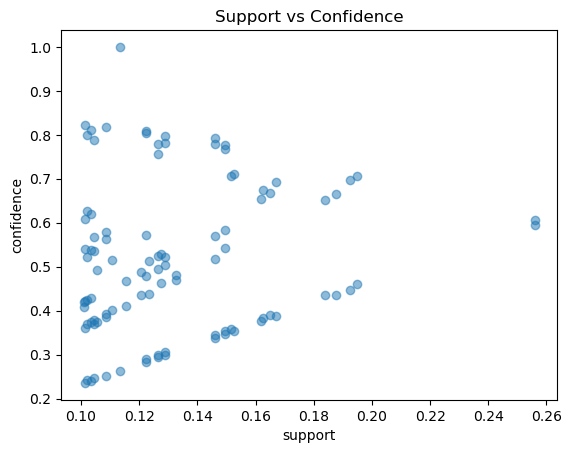

In [17]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

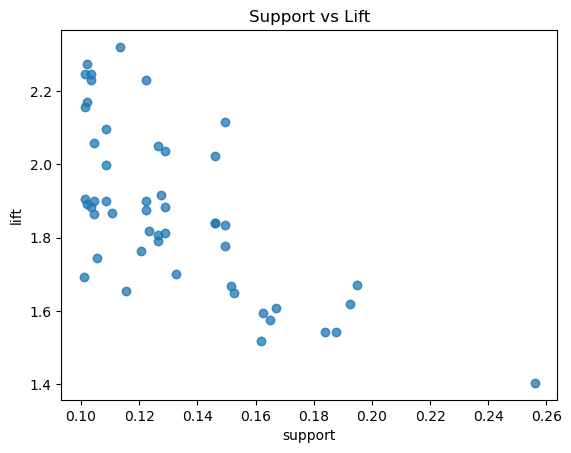

In [18]:
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

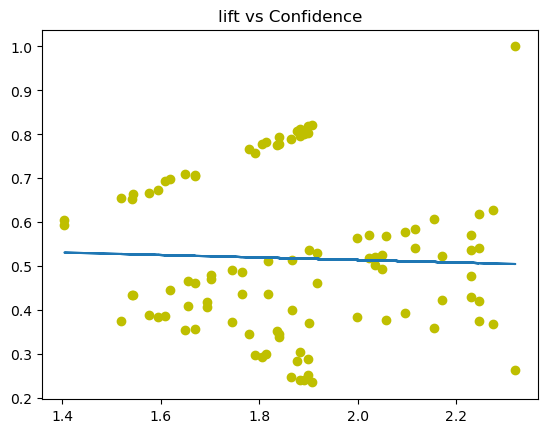

In [19]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))